<a href="https://colab.research.google.com/github/rpradata-ud/DSPS_RPradata/blob/main/HW/HW9/HW9_higgsbosonSearch_RPradata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Note to self:

Tree method: Supervised learning method; partitions feature space along each feature seperately

can do regression with trees (CART) -- with sklearn.DecisionTreeRegressor

issue with trees: different trees lead to different results (variance)
But soln: run many trees and make ensemble decision

Tree methods in class: Random Forests and Gradient Boosted Trees

feature importance

#notes from class 11/29
single tree. visualization called dendrogram
cut decisions - to prevent overfitting

##Important note to self:
##**In problems like this, always set RANDOM SEED!!**

#Start hw: mount drive. kaggle

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import os
import json
import missingno as msno
%matplotlib inline
%pylab inline

#pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")

Populating the interactive namespace from numpy and matplotlib


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- Download the Higgs boson data from Kaggle (programmatically within the notebook)
see how I did it in the Titanic Trees notebook https://github.com/fedhere/DSPS_FBianco/blob/main/CodeDemos/titanictree.ipynb

find the correct API link here https://www.kaggle.com/c/higgs-boson/data



- Read in the trainind data. Split the provided training data into a training and a test set.
The last 2 columns are what you want to predict: "weight" and "label".
Remove them from the input data and create a separate variable label and a separate variable weight, which will be your target variables for, respectively, classification and regression.



In [3]:
# ls

In [4]:
# pwd

In [5]:
cd /content/drive/MyDrive/DSPS2023

/content/drive/MyDrive/DSPS2023


In [6]:
# ls kag*

Now hide it, and change permission of that file.

In [7]:
#!mv kaggle.json .kaggle.json

In [8]:
# !chmod 600 .kaggle.json

^this changes permission of file

format: my permission. then, group permission. then, everyone else permission.

###

comment above out because after it is run, machine doesn't recognize kag* anymore, but ".kag*" because now there is a "." in front of the filename in the drive.

In [9]:
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [10]:
# ls

now the kaggle data is hidden

In [11]:
# !ls .kag*

In [12]:
# !ls -l .kag*

In [13]:
# !chmod 600 kaggle.json

In [14]:
# !ls -l kag*

In [15]:
cd /content/drive/MyDrive/DSPS2023

/content/drive/MyDrive/DSPS2023


In [16]:
pwd

'/content/drive/MyDrive/DSPS2023'

In [17]:
ls .kag*

.kaggle.json


In [18]:
# !mkdir higgs

In [19]:
cd higgs/

/content/drive/MyDrive/DSPS2023/higgs


In [20]:
# !kaggle competitions download -c higgs-boson


the kaggle download was not working; could not find the kaggle jason. Then Masooma helped. I needed to specify the environment, and then make a directory for the higgsboson data. Need to follow the instructions according to the order in titanictree GitHub code.

In [21]:
!ls

HiggsBosonCompetition_AMSMetric_rev1.py  random_submission.csv	test.csv  training.csv
higgs-boson.zip				 random_submission.zip	test.zip  training.zip


In [22]:
# !unzip higgs-boson.zip



(cybersecurity .01 lol)

In [23]:
# !unzip random_submission.zip

In [24]:
# !unzip test.zip

In [25]:
# !unzip training.zip

#Above, I am commenting out all the zipping, permissions, etc so that I wouldn't have to go through the process of replacing/not replacing and permissions etc every time I run the notebook.

In [26]:
ls

HiggsBosonCompetition_AMSMetric_rev1.py  random_submission.csv  test.csv  training.csv
higgs-boson.zip                          random_submission.zip  test.zip  training.zip


In [27]:
higgsdata = pd.read_csv("training.csv")

In [28]:
higgsdata.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [29]:
higgsdata.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


now evaluate the missing values; these are the values of -999.00. decided to change these into NaN

In [30]:
higgsdata = higgsdata.replace(-999.000, np.NaN)
# higgsdata

In [31]:
higgsdata.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,NaN,NaN,NaN,3.473,2.078,...,1,46.226,0.725,1.158,NaN,NaN,NaN,46.226,2.233584,b
2,100002,NaN,162.172,125.953,35.635,NaN,NaN,NaN,3.148,9.336,...,1,44.251,2.053,-2.028,NaN,NaN,NaN,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,NaN,NaN,NaN,3.310,0.414,...,0,NaN,NaN,NaN,NaN,NaN,NaN,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,NaN,NaN,NaN,3.891,16.405,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,6.245333,b


Now visualize the missing data:

<Axes: >

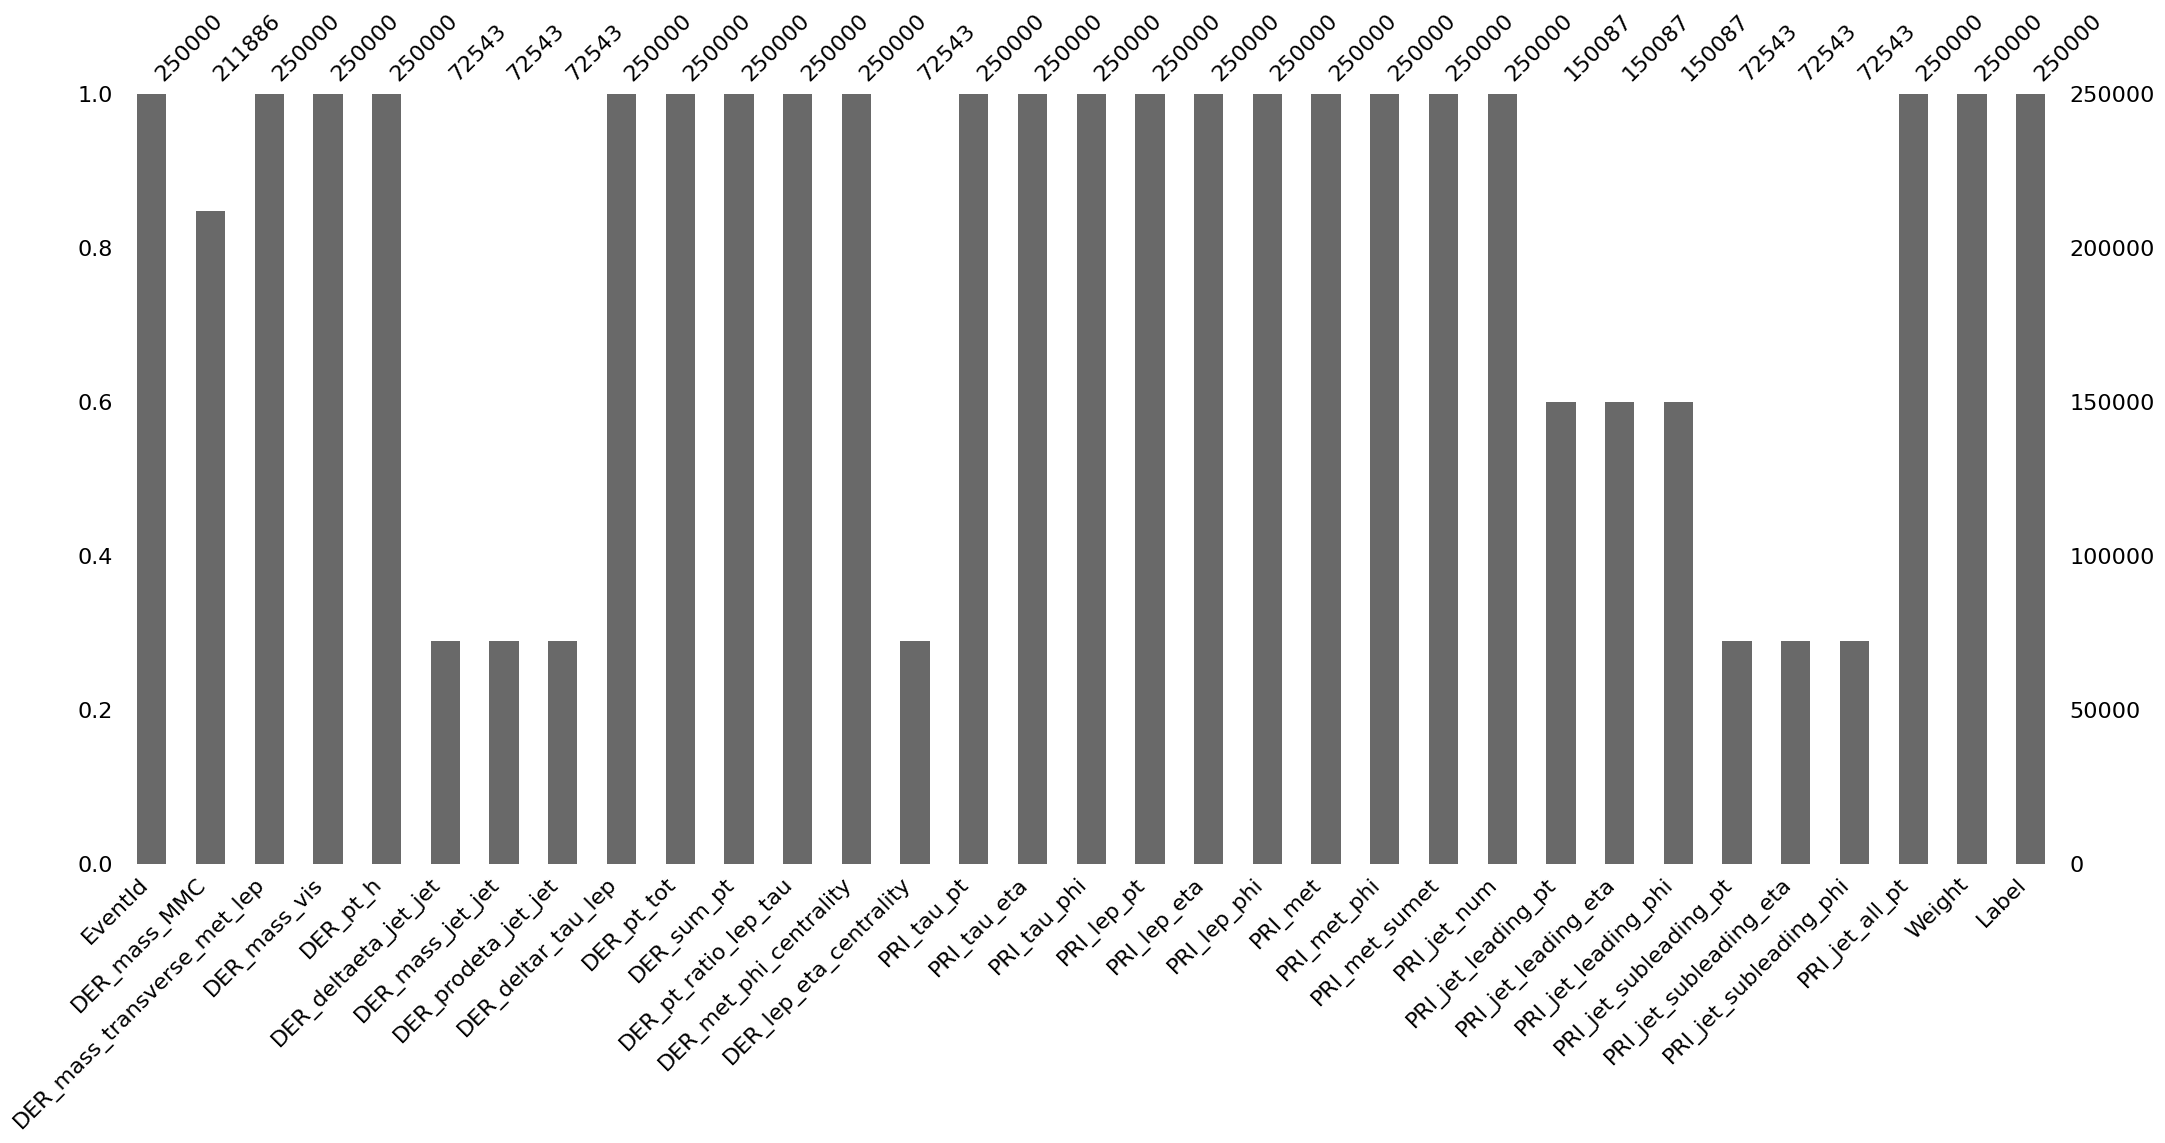

In [32]:
msno.bar(higgsdata)

Figure 1: Bar graph to visualize "missing data" in the higgs-boson kaggle dataset. The "incomplete" bar lines in indicate the presence of such missing data by column. It seems that there are 7 columns that have significantly large proportion of missing data, marked by "NaN" values in the dataframe (namely DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet PRI_jet_leading_pt  PRI_jet_leading_eta  PRI_jet_leading_phi PRI_jet_subleading_pt  PRI_jet_subleading_eta  PRI_jet_subleading_phi).


Because our RF and GBT won't be able to handle missing values, I decide to eventually drop these columns.

In [33]:
labels = np.array(higgsdata["Label"])
labels

array(['s', 'b', 'b', ..., 's', 'b', 'b'], dtype=object)

In [34]:
weights = np.array(higgsdata["Weight"])
weights

array([0.00265331, 2.23358449, 2.34738894, ..., 0.01863612, 1.68161144,
       1.87747381])

#TASK 1: Use a Random Forest and a Gradiend Boosted Tree Classifier model to predict the label of the particles. get the score of the model on the training and test set and comment on the result for each model.

In [35]:
#strategy: drop features in the dataframe that have NaN values more than a specific number of times
# print(len(X))

# higgsdata.head()
higgsdata_select = higgsdata.copy()

for column_name, column_data in higgsdata_select.iteritems():
  nan_count = higgsdata_select[column_name].isna().sum()
  if nan_count >= (len(higgsdata_select)/2):
    higgsdata_select.drop(column_name, axis = 1, inplace = True)
  if column_name == "Label":
    break



<ipython-input-35-4d00cf0cd9d1>:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column_name, column_data in higgsdata_select.iteritems():


<Axes: >

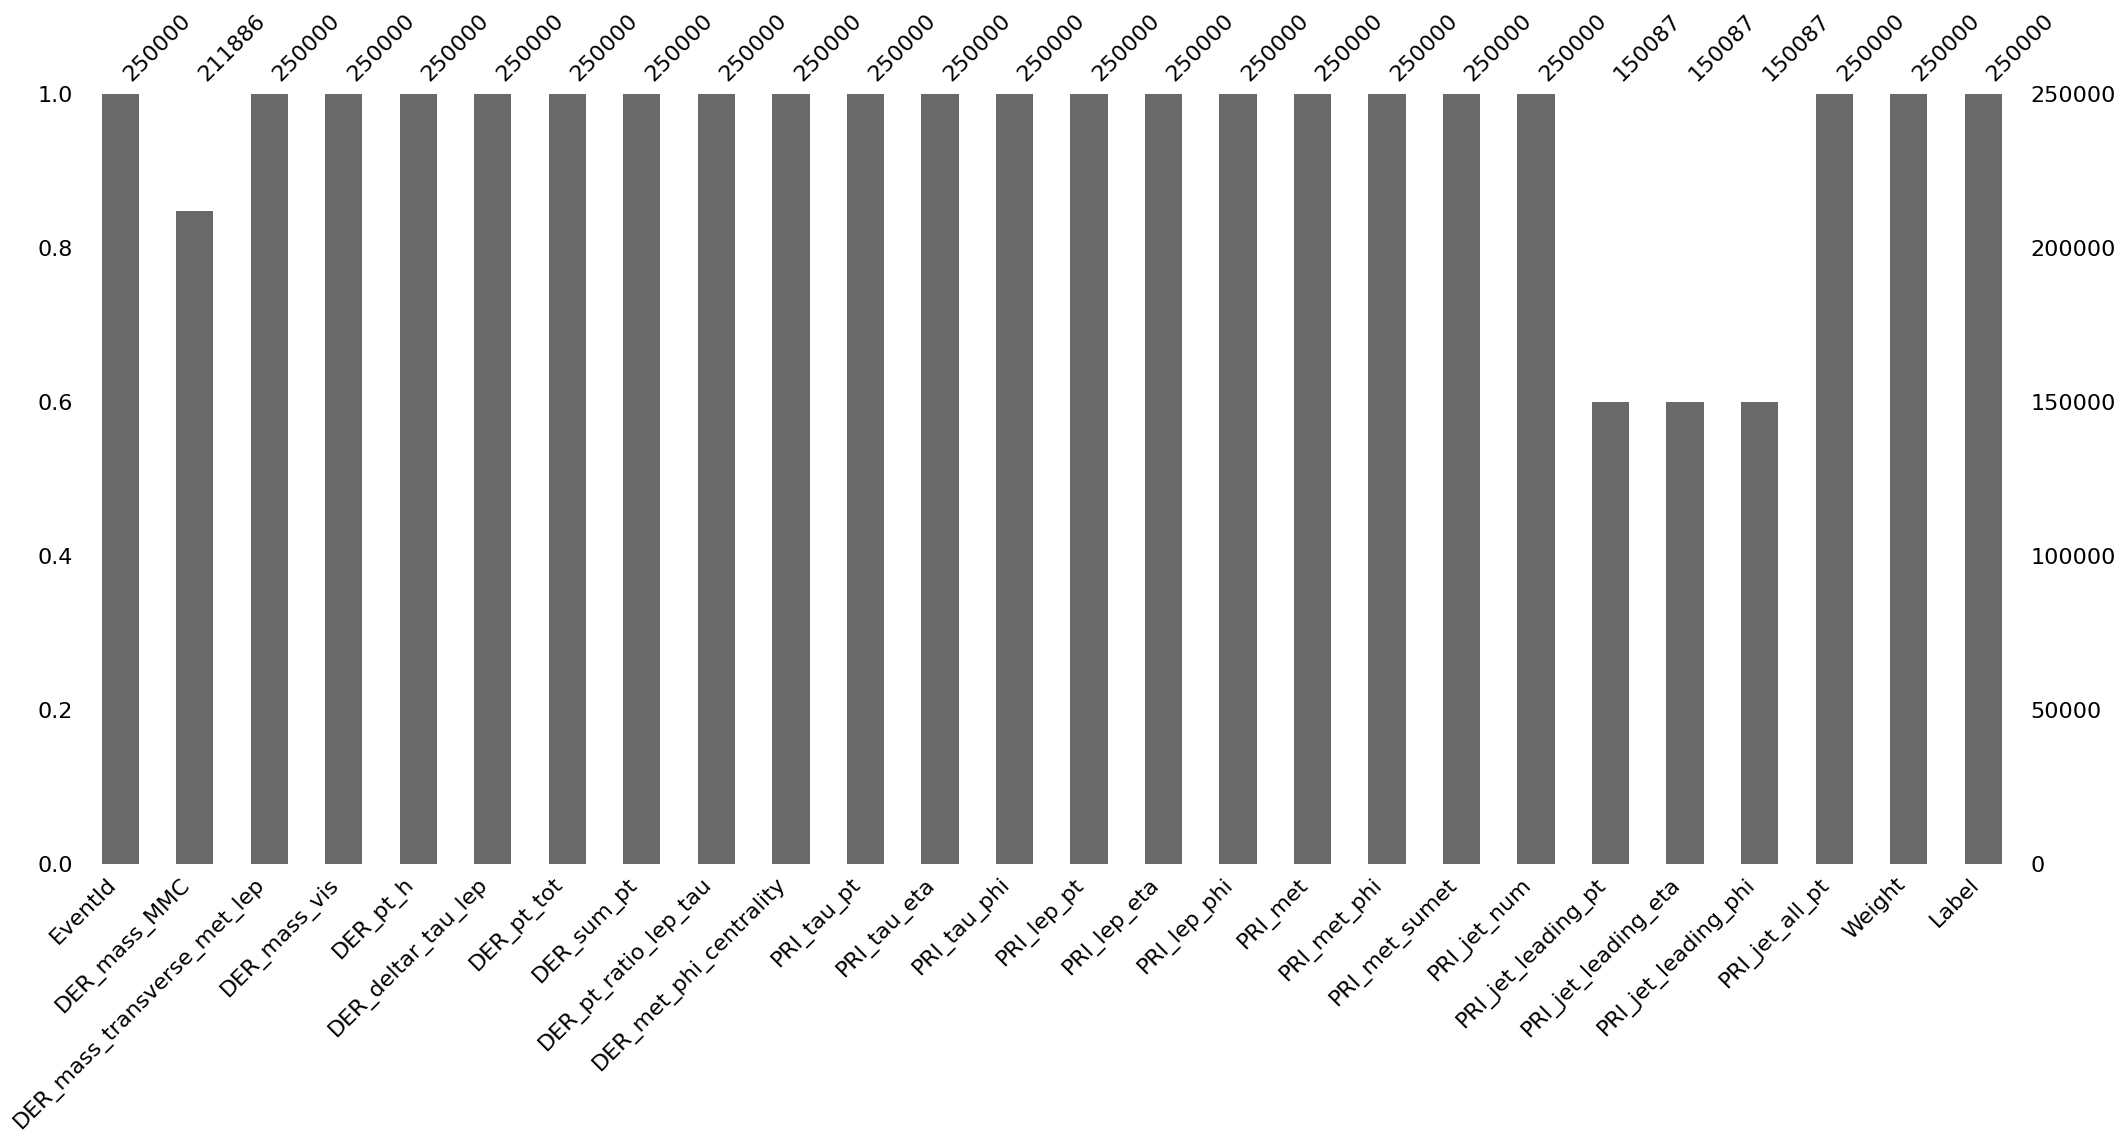

In [36]:
higgsdata_select.head()
msno.bar(higgsdata_select)

Fig. 2: Bar graph to visualize missing code, as in Fig. 1, yet with the said 7 columns dropped. There does seem to be significantly less missing values, however I still needed to cut more of them to completely "eliminate" them, because RF and GBT can't handle NaN.

I had a whole discussion with Paula, Sarah, and Masooma about dealing with the NaN value. We ended with different approaches, but at the end of the day, the intention is to get rid of the NaN values with losing the least amount of information possible. One could remove all the columns that had NaN values, or even remove all the rows that had NaN values. However, I felt that doing either of them alone could lead to too much data loss. In the former, I was worried that removing too many features/columns could largely impact our result, while in the latter, my problem was that it could collide with the possibility that every row could have a NaN value. Therefore, I decided to do a combination of cutting columns and rows.

For Fig. 2, I had removed the columns with the specified proportion of NaN values. After that, I remove all the remaining rows that have missing NaN values.


<Axes: >

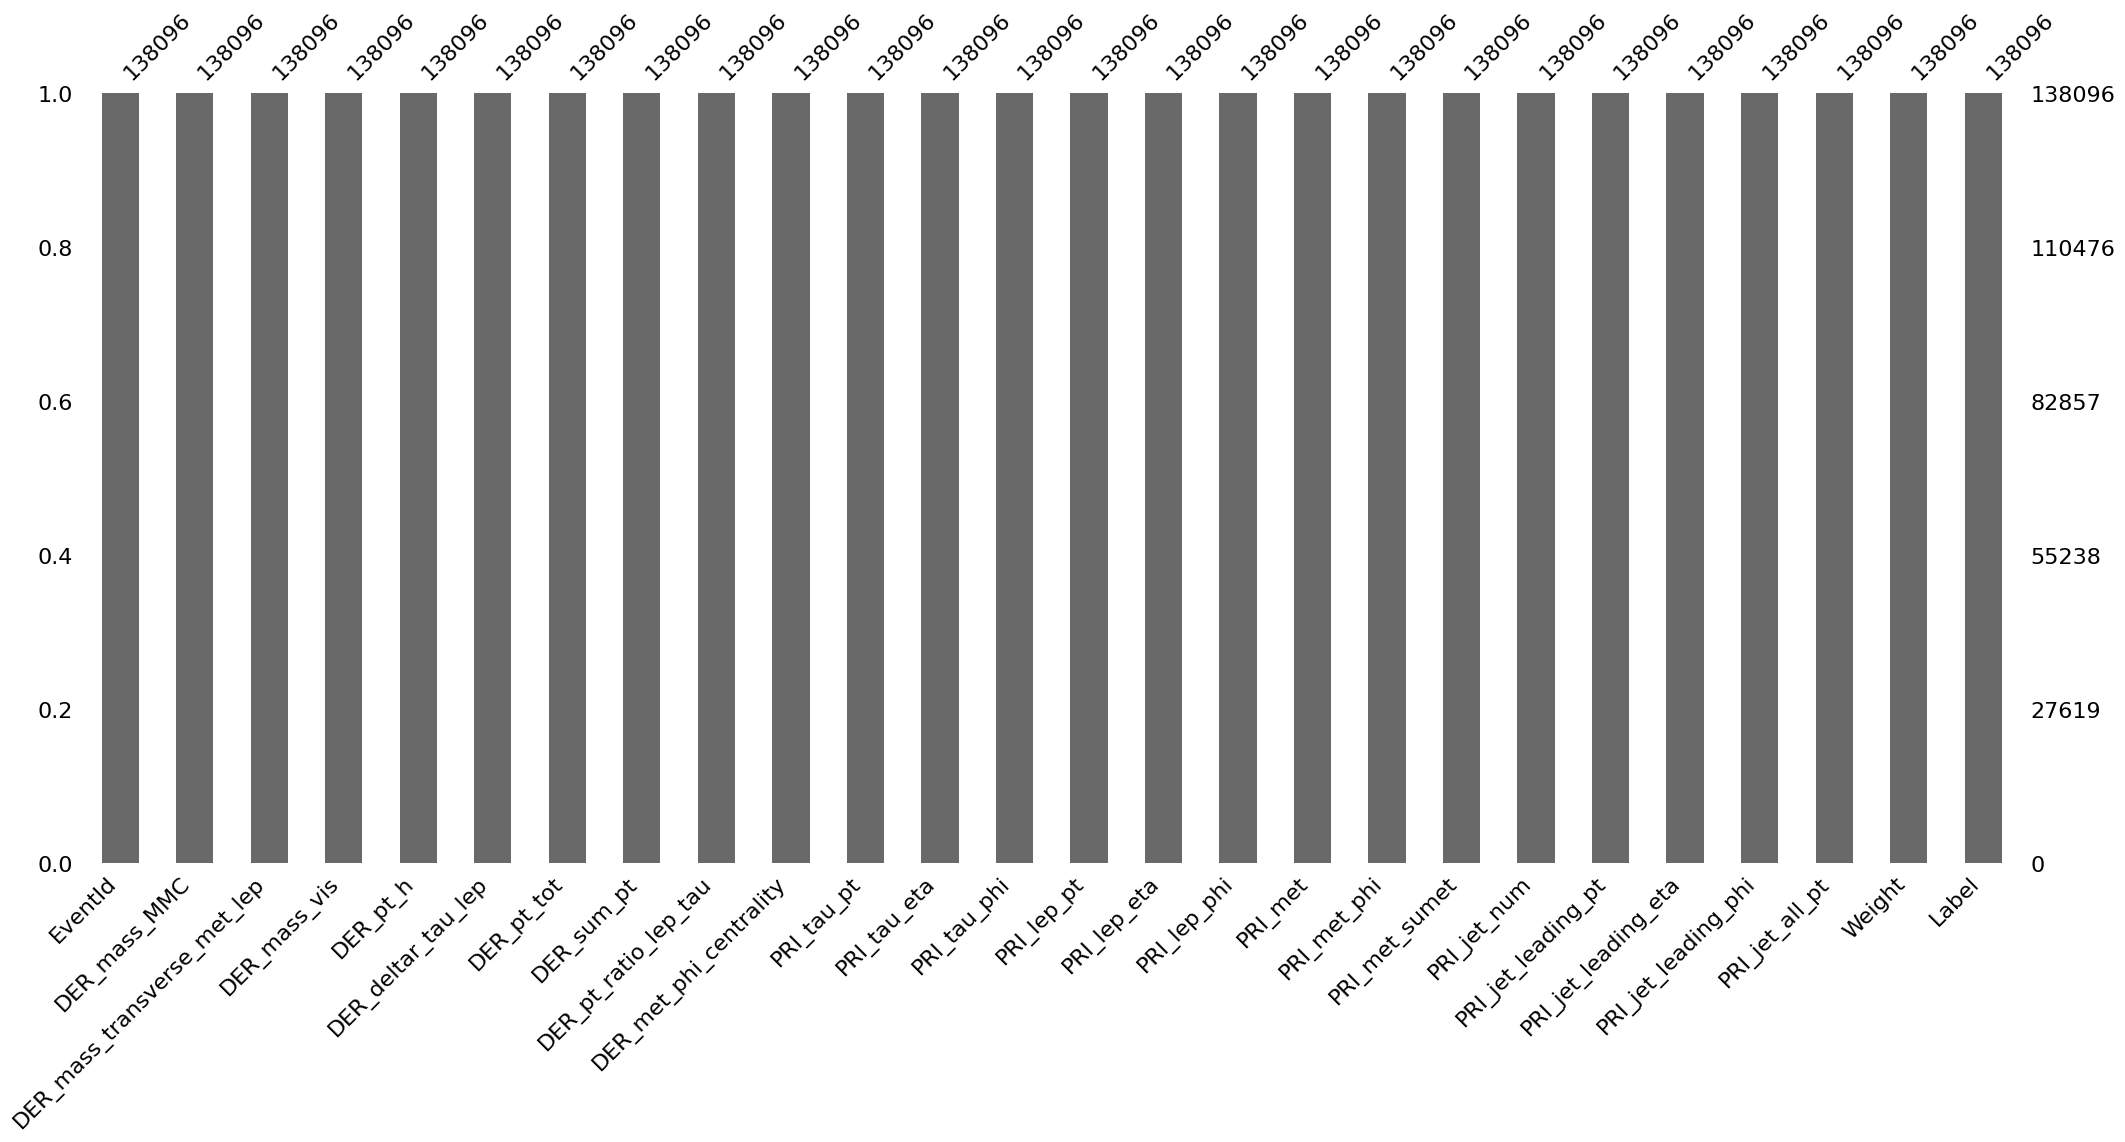

In [37]:
higgsdata_select = higgsdata_select.dropna()
msno.bar(higgsdata_select)

Fig. 3: The bar graph as in Fig. 2 and Fig. 1 that shows the data after I removed the remaining rows from the data shown in Fig. 2 that still had NaN values. Despite the fact that now we have almost half of the data per column (138096 vs. 250000 datapoints), I think this is still the best I can do. In this figure, there are no more missing values.


In [38]:
from sklearn.model_selection import train_test_split

- Use a Random Forest and a Gradiend Boosted Tree Classifier model to predict the label of the particles. get the score of the model on the training and test set and comment on the result for each model.


##**Important:** Set a seed

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

np.random.seed(42)

# Look at parameters used by our current forest
rf = RandomForestClassifier(random_state = 42, n_estimators = 100, max_depth= 9)
print('RF Parameters currently in use:\n')
print(rf.get_params())

RF Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [40]:
gbt = GradientBoostingClassifier(random_state = 42, n_estimators = 100, max_depth = 4)
print('GBT Parameters currently in use:\n')
print(gbt.get_params())

GBT Parameters currently in use:

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [41]:
# from sklearn.impute import SimpleImputer

from sklearn.preprocessing import LabelEncoder

X = higgsdata_select.drop(columns=['Label', 'Weight'])
labels = np.array(higgsdata_select["Label"])
y_str = labels
#labels is new now

#want to convert string labels to numerical labels

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_str)


# imputer = SimpleImputer(strategy='constant', fill_value = -999.00)

# X = imputer.fit(X)




^Note to self:

So, I found that if I feel the y values as it is, there is a string issue.

Instead, we needed to use label encoder.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [43]:
rf.fit(X_train, y_train)
# gbt.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, random_state=42)

In [44]:
gbt.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=4, random_state=42)

calculate the  scores for the training and test sets and evaluate  overtraining etc

In [45]:
# rf.score(X_test_imputed, y_pred_rf)

#^tried this instead

from sklearn.metrics import accuracy_score, mean_squared_error

y_train_rf = rf.predict(X_train)
rfscore_train = accuracy_score(y_train, y_train_rf)
# ystr_train_rf = label_encoder.inverse_transform(y_train_rf)
# rfscore_train = rf.score(X_train, ystr_train_rf)

y_test_rf = rf.predict(X_test)
rfscore_test = accuracy_score(y_test, y_test_rf)
# ystr_test_rf = label_encoder.inverse_transform(y_test_rf)
# rfscore_test = rf.score(X_test, ystr_test_rf)




In [46]:
print("Label Random Forest Train Score: {:.5f}".format(rfscore_train))
print("Label Random Forest Test Score: {:.5f}".format(rfscore_test))

Label Random Forest Train Score: 0.81518
Label Random Forest Test Score: 0.80535


In [47]:
y_train_gbt = gbt.predict(X_train)
gbtscore_train = accuracy_score(y_train, y_train_gbt)
# gbtscore_train = gbt.score(X_train, y_train_gbt)

y_test_gbt = gbt.predict(X_test)
gbtscore_test = accuracy_score(y_test, y_test_gbt)
# gbtscore_test = gbt.score(X_test, y_test_gbt)



In [48]:
print("Label Gradient Boosted Train Score: {:.10f}".format(gbtscore_train))
print("Label Gradient Boosted Test Score: {:.10f}".format(gbtscore_test))

Label Gradient Boosted Train Score: 0.8239582126
Label Gradient Boosted Test Score: 0.8199513382


The score should not be 1.0. I was initially getting that. Sarah suggested on using accuracy_score instead of rf.score. For some reason, this worked now.

I tried .score again, but kept on getting 1.0 values. Paula then pointed out that the values I put for the predicted y should be the inverse-coded ones (labels instead of binary-like). But it was still not working for me, so I went back to accuracy_score. I left .score as commented.

**Comment on the scores for label prediction**

*Without specifying max_depth (hence using default max_depth = 3):*

For RF, it was definitely overfitting. The score for training was almost 1.0, while that for test is around 84%, so there is an almost 16% overfit.

On the other hand, the GBT seems to be scoring significantly better.

*After specifying max_depth:*

For RF, I tried increasing values of the max_depth. I found that by increasing it from 3, overfitting decreased. But when max_depth is too high (in this case, I tried 30), overfitting increased again. Therefore, there must be an optimal "range" for max_depth that would "minimize" overfitting. Here, I chose it to be 9, and the overfitting was by around 1%.

Without changing the max_depth default, the GBT prediction was already quite good. It was also overfitting by around 1%, so I varied the parameter to max_depth = 4, and the overfitting became less than 1% (~0.4%).



- Produce a confusion matrix for each model and compare them






In [49]:

# I creaded this function (mostly copied from sklearn examples).
# You can use it to create the confusion matrix
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title='',
                          cmap=pl.cm.bone):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize: #normalize == True
          title = title + ' Normalized confusion matrix'
    else:
          title = title + ' Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # plot it
    fig, ax = pl.subplots(1, 1)
    fig.subplots_adjust()
    im = ax.imshow(cm, cmap=cmap)
    ax_divider = make_axes_locatable(ax)
    # add an axes to the right of the main axes.
    pl.xticks([0, 1], labels=["N", "P"])
    pl.ylim(-0.5,1.5)
    pl.yticks([0,1], labels=["N", "P"])
    pl.xlabel("True label")
    pl.ylabel("Predicted label")
    pl.title(title)
    cax = ax_divider.append_axes("right", size="10%", pad="2%")
    cb = pl.colorbar(im, cax=cax)



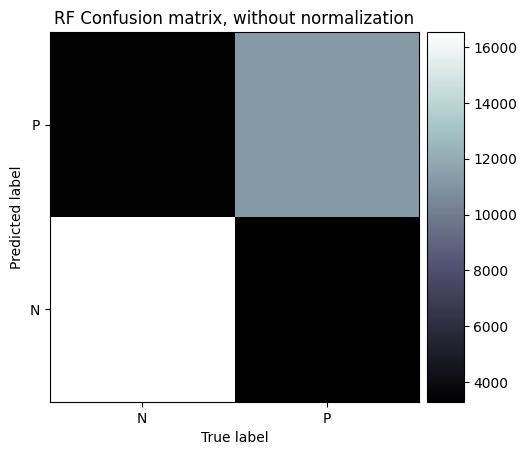

In [50]:
plot_confusion_matrix(y_test, y_test_rf, title = 'RF')

Fig. 4: A confusion matrix for the Random Forest-run data label prediction, with max_depth = 9. P marks "positive" reading, and N marks "negative" reading. The columns in the downwards diagonal show false predictions (false positive and false negative respectively), while the upwards diagonal show the correct predictions. The color bar indicates the number of points. It can be seen that the false predictions are very low (dark-colored), while the true predictions are a lot higher, on the other end of the color spectrum. The true negatives are particularly more abundant than the true positives.

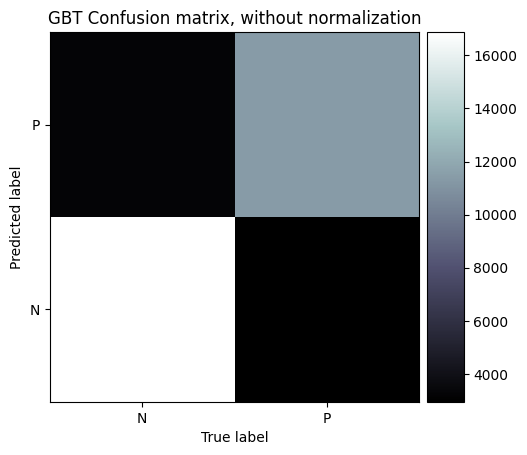

In [51]:
plot_confusion_matrix(y_test, y_test_gbt, title = 'GBT')

Fig. 5: A confusion matrix as in Fig. 4, for the Gradient Boosted Tree prediction, with max_depth = 4. This has a very similar trend to that for RF in Fig. 4, with the false predictions being less than the true predictions (by about 1/3 to 1/4 of it). Moreover, the true negatives are also more than true positives. I think this could happen because there are a lot more "negative" labels than "positive", hence it is harder to look for a positive indication in the higgs-boson data.


Notes to self: confusion matrix works well for data classifying "two" lables. Here, "s" marks signal (positive detection of higgs-boson), while "b" markes "background" (negative detection).

#required for 661, EC for 461
- # Task 2: Use a Random Forest and a Gradiend Boosted Tree Regressor model to predict the weight of the particles. Compare the model performance on training and test setsm


In [52]:
# X = higgsdata_select.drop(columns=['Label', 'Weight'])
weights = np.array(higgsdata_select["Weight"])
# y_str = labels
# #labels is new now

#want to convert string labels to numerical labels

# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y_str)

In [53]:
traindata_weights, testdata_weights, train_weights, test_weights = train_test_split(X, weights, test_size=0.25, random_state=42)

In [54]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

rfR = RandomForestRegressor(n_estimators=100, max_depth=9,
                                  random_state=42)
rfR.fit(traindata_weights, train_weights)


RandomForestRegressor(max_depth=9, random_state=42)

In [55]:
train_rfR = rfR.predict(traindata_weights)


test_rfR = rfR.predict(testdata_weights)



#ValueError: continuous is not supported
#hence, use mean squared error

In [56]:
gbtR = GradientBoostingRegressor(n_estimators = 100, random_state = 42, max_depth=4)
gbtR.fit(traindata_weights, train_weights)

GradientBoostingRegressor(max_depth=4, random_state=42)

In [57]:
train_gbtR = gbtR.predict(traindata_weights)

test_gbtR = gbtR.predict(testdata_weights)



 Calculate the L2 and L1 loss functions for the fitted regression models (see slides for the definition) and discuss the results

In [58]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print("TRAIN DATA:")

l1RFtrain = mean_absolute_error(train_weights, train_rfR)
l2RFtrain = mean_squared_error(train_weights, train_rfR)
print("L1 RF {}".format(l1RFtrain))
print("L2 RF {}".format(l2RFtrain))

l1GBTtrain = mean_absolute_error(train_weights, train_gbtR)
l2GBTtrain = mean_squared_error(train_weights, train_gbtR)
print("L1 GBT {}".format(l1GBTtrain))
print("L2 GBT {}".format(l2GBTtrain))


print("----------")
print("TEST DATA:")

l1RFtest = mean_absolute_error(test_weights, test_rfR)
l2RFtest = mean_squared_error(test_weights, test_rfR)
print("L1 RF {}".format(l1RFtest))
print("L2 RF {}".format(l2RFtest))

l1GBTtest = mean_absolute_error(test_weights, test_gbtR)
l2GBTtest = mean_squared_error(test_weights, test_gbtR)
print("L1 GBT {}".format(l1GBTtest))
print("L2 GBT {}".format(l2GBTtest))

TRAIN DATA:
L1 RF 0.507707336263464
L2 RF 0.5363559622107277
L1 GBT 0.5176322313591539
L2 GBT 0.5684658109464021
----------
TEST DATA:
L1 RF 0.5363061994825402
L2 RF 0.6269769299749134
L1 GBT 0.532619317923212
L2 GBT 0.6119080979167765


Discussion:

With the same parameters set as the RF and GBT classifiers, I don't get excellent scores. They all are around 50% to 60%. My speculation is that I might need to change parameters like the max_depth, random state, and test size.

Though, there are still a few things we can point from these scores. It does seem that the test data scores higher than the train data; in this case, this could be underfitting. The way I interpret this is that test predictions has more accuracy, but in order to do that, the whole dataset sets lower bars (makes worse predictions). Moreover, the L2 scores seem to be higher than L1 scores, hence these might work better for them. We can also see that in the train data, the GBT regressor generally scores higher than the RF, but the opposite is true in the test data (comparing L1 to L1, and L2 to L2).

# Choose between feature importance and grid optimization (both 461 and 661)

- For the Random Forest classifier, find the 4 most important features based on the simple unoptimized model you created earlier on. Use the documentation to find out what they are. We have not talked abotu the physics of this problem at all but the Kaggle challenge description should provide enogh information for you to comment on this result is somewhat superficially.

You can use ```rf.feature_importance_``` on the trained model to extract the relative importance of each feature (a number from 0 to 1) and then choose the features that have the 4 highest numbers (the numpy function ```argsort()``` is helpful here!)







- Explore the parameter space with the sklearn module ```sklearn.model_selection.RandomizedSearchCV``` *fitting only those 4 features*

Follow this example to set up the parameter search. Set the estimators to 10 and 100, (the number of trees) and the max depth to 3, and 10, and None (let it be unconstrained). Set bootstrap to both True and False. Set the number of features to consider at every split to both "autp" and "sqrt". Use ```pprint``` like I did earlier in this notebook to print the parameters set

**this takes some computational time! so do not start this at the last minute!!**

In [59]:
#I'll just follow this example. We are settin up a parameter search

random_grid = {
    'max_depth': [3, 10, None],
    'max_features': ['auto', 'sqrt'],
    'n_estimators': [10, 100, 1000]}
print(random_grid)

#this is for later random_search

{'max_depth': [3, 10, None], 'max_features': ['auto', 'sqrt'], 'n_estimators': [10, 100, 1000]}


In [60]:
# pprint(random_grid)


 mine and your best features do not necessarily have to be the same because our models may be different (different parameters, different random seed etc)

In [61]:
#now find best features

# best_features_index = rf.feature_importances_
# best_features_index = np.argsort(best_features_index)[0:4]

best_features_index = rf.feature_importances_
best_features_index = best_features_index.argsort()[-4:][::-1]#sorts from lowest to highest ( and then flip in ascending order) #from Masooma
highest_feat_names = X_train.columns[best_features_index]
print(highest_feat_names)


#from Masooma

Index(['DER_mass_MMC', 'DER_mass_vis', 'DER_mass_transverse_met_lep',
       'DER_met_phi_centrality'],
      dtype='object')


Data used for RF (after NaN elimination):

In [62]:
higgsdata_select.iloc[:, best_features_index]

,DER_mass_MMC,DER_mass_vis,DER_mass_transverse_met_lep,DER_met_phi_centrality
0,138.470,97.827,51.655,1.396
1,160.937,103.235,68.768,1.414
5,89.744,59.149,13.550,0.479
6,148.754,107.782,28.862,1.393
7,154.916,94.714,10.418,-1.305
...,...,...,...,...
249988,89.509,79.870,86.277,-0.800
249991,133.457,88.989,77.540,-0.084
249993,130.075,66.781,3.918,-0.634
249994,217.020,62.824,47.156,1.393


**Discussion:**

From implementing feature importance in the RF, we find that our "most relevant" features are DER_mass_MMC (derived Missing Mass Calculation), DER_mass_vis (visible mass, which could refer to the mass of particles that can be directly detected or observed in an experiment), DER_mass_transverse_met_lep (~transverse mass involving the missing energy (MET) and the lepton (charged particle) in the event), and DER_met_phi_centrality (the azimuthal angle (phi) centrality of the missing transverse energy (MET) in the event).

It seems that the features related to mass, energy, and charged particle are the most important features to detect the higgs-boson particle.

The higgs-boson is detected particle properties measured by collision points as well as their patterns, and I think that running this algorithm by rf.feature_importance underlines this significance. In general, based on my knowledge, the presence of Higgs boson events are indicated by these kinds of patterns that people are still studying. Moreover, I think over time as more data is collected, machine learning is a very useful way to make this happen.



In [63]:
# higgsdata.iloc[:, best_features_index]

In [64]:
from sklearn.model_selection import RandomizedSearchCV
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation,
# search across 18 different combinations
random_search = RandomizedSearchCV(estimator = rf, param_distributions=random_grid,
                                   n_iter=1, cv=3)


Note that this may take a long time! It took 1 hour for me to run this. Dont start at the last minute!!

*note to self*:
RandomizedSearchCV is a method used for hyperparameter tuning in machine learning models.


what does this do?

1. Hyperparameter Tuning: The process of finding the best combination of hyperparameters for a machine learning model.
2. Random Search: Unlike Grid Search, which exhaustively searches through a predefined set of hyperparameter values, Randomized Search randomly samples a specified number of combinations from a hyperparameter space. This is better when hyperparameter space is large
3. Cross-Validation: RandomizedSearchCV uses cross-validation to evaluate the performance of each combination of hyperparameters. Cross-validation involves splitting the dataset into multiple folds, training the model on some folds, and evaluating it on the remaining folds. This process helps to provide a more robust estimate of the model's performance.
4. Optimization: The goal of RandomizedSearchCV is to find the set of hyperparameters that results in the best model performance based on a specified scoring metric (e.g., accuracy, precision, recall, etc.).

In [65]:
# Fitting the object to the training data
random_search.fit(X_train.iloc[:, best_features_index], y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=9,
                                                    random_state=42),
                   n_iter=1,
                   param_distributions={'max_depth': [3, 10, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 100, 1000]})

**Above, I am inputting the selected "best" features from best_features_index = rf.feature_importances_, intending to help for a more "specific" prediction. From here on, I am also inputting the selected "best" features**

^Tali and Paula suggested this, and I thought it was worth to see how only inputting these selected features would affect the outcome prediction.

In [66]:
# Get the best hyperparameters
best_params = random_search.best_params_

In [75]:
#Evaluate on the test data
accuracy_on_test_set = random_search.score(X_test.iloc[:, best_features_index], y_test)

In [83]:
print("Tuned RF  Parameters: {}".format(best_params))
print("Best (test) score is {:.3f}".format(accuracy_on_test_set))


Tuned RF  Parameters: {'n_estimators': 10, 'max_features': 'auto', 'max_depth': 3}
Best (test) score is 0.777


In [77]:
df = pd.DataFrame(random_search.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.722401,0.112137,0.039071,0.001626,10,auto,3,"{'n_estimators': 10, 'max_features': 'auto', '...",0.780645,0.779081,0.774823,0.778183,0.00246,1


In [71]:
# df

Plot a simple 3-point ROC curve for the model with the best parameters found in the previous step. Describe it.

*note to self*:
The ROC curve is a graphical representation of the trade-off between true positive rate (sensitivity) and false positive rate (1-specificity) for different threshold values.

"A 3-point ROC curve is a simplified version where you specifically evaluate the model's performance at three predefined thresholds. These thresholds are often chosen to represent different operating conditions or priorities based on the application's requirements."


http://getthediagnosis.org/roc.html#:~:text=The%20dashed%20line%20represents%20a,dropping%20as%20we%20move%20right).

https://en.wikipedia.org/wiki/Receiver_operating_characteristic



In [78]:
ystr_train = label_encoder.inverse_transform(y_train)

# y_train

**CODES FOR RF WITH BEST PARAMETERS:**

In [79]:
#rf.fit(X_train, ystr_train.values.flatten()=="s", max_depth = 10)

#rf.fit(X_train, y_train, max_depth = 10)

np.random.seed(42)

rf = RandomForestClassifier(**best_params)

rf.fit(X_train.iloc[:, best_features_index], y_train)


#instead of hardcoding parameters in rf, just use **best_params. Do your best not to hardcode!

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=3, max_features='auto', n_estimators=10)

*note to self*: The Area Under the Curve (AUC) in the context of plotting a Receiver Operating Characteristic (ROC) curve provides a quantitative measure of the overall performance of a binary classification model.

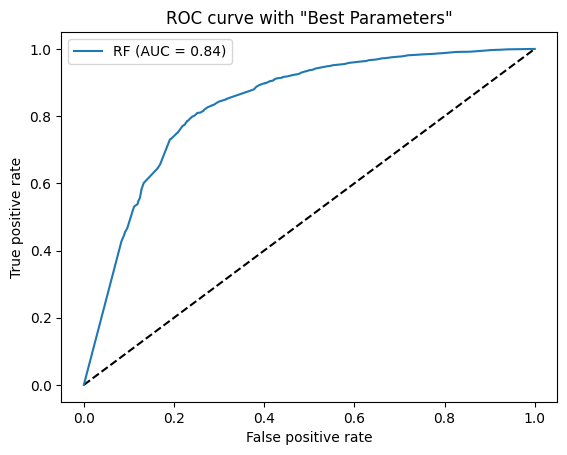

In [81]:
# The random forest model by itself
from sklearn.metrics import roc_curve, auc
y_pred_grd_rfcat = rf.predict_proba(X_test.iloc[:, best_features_index])[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(y_test, (y_pred_grd_rfcat)) #"_" is the "threshold"


roc_auc = auc(fpr_rf, tpr_rf)

pl.figure(1)
pl.plot([0, 1], [0, 1], 'k--')
pl.plot(fpr_rf, tpr_rf, label='RF (AUC = {:.2f})'.format(roc_auc))
pl.xlabel('False positive rate')
pl.ylabel('True positive rate')
pl.title('ROC curve with "Best Parameters"')
pl.legend(loc='best')
pl.show()


Fig. 6: ROC curve for the Random Forest prediction, showing the True positive rate vs. False positive rate. This curve graphically represents the trade-off between these two. That for the RF is shown in blue, and it has computed AUC (Area Under Curve) of 0.84. The dashed diagonal curve at 45 degrees is the chance line, which corresponds to random chance (as of random classifier). The region to the left of the chance line shows models performing better than a random classifier, while that to its right show models performing worse. A perfect model would be at True positive = 1, and False postive = 0, with AUC = 1.


In Fig. 6, we see that the ROC curve for our RF classifier model bends towards the left region ("convex"), which shows that it is doing quite of a good job in terms of producing true positives, at AUC = 0.84. Relating to the confusion matrix in Fig. 4 (with max_depth = 9), we have seen that the model produces more (around 3-4 times) true positives than false positives.

Hence, I think the RF classifier has the tendency towards this trend for this particular dataset, at specified max_depth values.

However, we can still see that the model under these "selected" parameter and features performs worse than those in our very first model with our original "eyeballed" parameters (accuracy score of 0.777 vs around 0.805-0.815).

This was opposite to what I expected, because I thought that specifying the features even more could lead to better results.
However, now I realize that this may actually be the reason why it performs worse -- the random_search.fit() parameter might need the entire dataset as it evaluates it as a whole, in order to give us the best parameters; not only from the few most "relevant" columns. Moreover, we haven't really set a "threshold" of importance if we were to only input some of the "most important columns" (in other words, we don't directly know whether features of "less" importance still significantly impacts the prediction to some level).

On another note, I think this ties back to our beginning problem of getting rid of data with the NaN values; we wanted to be careful not to consequently eliminate too much data.

Therefore, a further work to "improve" the model could be to readjust our method of hyperparameter tuning by inputting the fit() function with all the features as we had when we ran our first RF classifier.

*note to self*:

paper that talks about the HB prediction, for resource: https://www.sciencedirect.com/science/article/pii/S1877050920304907